##부스트 코스의 파이썬으로 시작하는 데이터 사이언스

###Pandas
- Excel보다 대용량 데이터를 처리하기에 적합
- 행과 열로 이루어져 있음

In [1]:
import pandas as pd

#### DataFrame
- 공식문서(도움말) 활용하기
- pd.DataFrame?
- 2차원의 자료구조를 가지고 있음

In [12]:
#데이터 프레임 만들기
#딕셔너리 형태로 a,b,c는 컬럼
#index 매개변수로 인덱스 값을 지정할 수 있음
df = pd.DataFrame(
    {'a' : [4,5,6],
     "b" : [7,8,9],
     'c' : [10,11,12]},
     index = [1,2,3])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [11]:
#index 값을 따로 지정하지 않으면 자동으로 지정됨
df2 = pd.DataFrame(
    {'aA' : [4,5,6],
     "bB" : [7,8,9],
     'cC' : [10,11,12]},
     )
df2

,aA,bB,cC
0,4,7,10
1,5,8,11
2,6,9,12


####Series
- 1차원의 자료구조를 가지고 있음

In [13]:
#시리즈 - Vector(벡터)로 표현할 수 있음
df['a']

1    4
2    5
3    6
Name: a, dtype: int64

In [14]:
#데이터 프레임 - matrix(행렬)로 표현할 수 있음
df[['a']]

,a
1,4
2,5
3,6


####Subset

In [17]:
df[df['a'] > 4]

,a,b,c
2,5,8,11
3,6,9,12


In [18]:
df['a','b']

KeyError: ignored

In [20]:
#두개 이상의 column(시리즈)를 가지고 올때는 반드시 데이터 프레임 형식으로 가져와야 한다.
df[['a','b']]

,a,b
1,4,7
2,5,8
3,6,9


####Summarize Data

In [22]:
df = pd.DataFrame(
    {'a' : [4,5,6],
     "b" : [7,8,9],
     'c' : [10,11,12]},
     index = [1,2,3])
df

df['a'].value_counts()

6    1
5    1
4    1
Name: a, dtype: int64

In [23]:
#각 column에 값을 하나씩 추가하고 확인
df = pd.DataFrame(
    {'a' : [4,5,6,4],
     "b" : [7,8,9,7],
     'c' : [10,11,12,10]},
     index = [1,2,3,4])
df

df['a'].value_counts()

4    2
6    1
5    1
Name: a, dtype: int64

In [24]:
len(df)

4

####Reshaping
- sort_values, drop

In [25]:
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12
4,4,7,10


In [27]:
df.sort_values(by='a')

,a,b,c
1,4,7,10
4,4,7,10
2,5,8,11
3,6,9,12


In [29]:
#기본값은 오름차순이지만 ascending=False로 지정하면 내림차순으로 지정할 수 있음
df.sort_values(by='a', ascending=False)

,a,b,c
3,6,9,12
2,5,8,11
1,4,7,10
4,4,7,10


In [31]:
#drop
#c라는 column을 drop, axis=1로 지정
df.drop(['c'],axis=1)

,a,b
1,4,7
2,5,8
3,6,9
4,4,7


In [36]:
#1번 인덱스를 drop하고 싶을때 axis=0으로 지정
#인덱스의 값을 입력해야함
df.drop([1],axis=0)

,a,b,c
2,5,8,11
3,6,9,12
4,4,7,10


Group Data
-groupby, pivot_table

In [39]:
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12
4,4,7,10


In [37]:
df.groupby(['a'])['b'].mean()

a
4    7
5    8
6    9
Name: b, dtype: int64

In [40]:
df.groupby(['a'])['b'].sum()

a
4    14
5     8
6     9
Name: b, dtype: int64

In [41]:
df.groupby(['a'])['b'].count()

a
4    2
5    1
6    1
Name: b, dtype: int64

In [43]:
#위의 세가지(mean, sum, count) 를 지정하여 한꺼번에 보고싶을때
#agg()
df.groupby(['a'])['b'].agg(['mean','sum','count'])

,mean,sum,count
a,,,
4,7,14,2
5,8,8,1
6,9,9,1


In [46]:
#describe()
#갯수, 평균, 표준편차, 등으로 조회할때
df.groupby(['a'])['b'].describe()

,count,mean,std,min,25%,50%,75%,max
a,,,,,,,,
4,2.0,7.0,0.0,7.0,7.0,7.0,7.0,7.0
5,1.0,8.0,NaN,8.0,8.0,8.0,8.0,8.0
6,1.0,9.0,NaN,9.0,9.0,9.0,9.0,9.0


In [47]:
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12
4,4,7,10


In [53]:
#aggfunc='mean'으로 기본값이 지정되어 있음
pd.pivot_table(data=df, index='a')

,b,c
a,,
4,7,10
5,8,11
6,9,12


In [50]:
#aggfunc='sum'으로 바꾸어 계산
pd.pivot_table(data=df, index='a',aggfunc='sum')

,b,c
a,,
4,14,20
5,8,11
6,9,12


In [57]:
#values 매개변수를 지정하여 특정 열을 지정할 수 있음
#values 매개변수에 []를 전달 할 수 있음
pd.pivot_table(data=df, index='a',values='b',aggfunc='sum')

,b
a,
4,14
5,8
6,9


Plotting
- 시각화

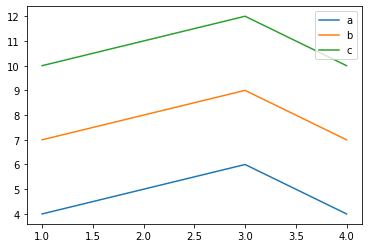

In [58]:
df.plot()

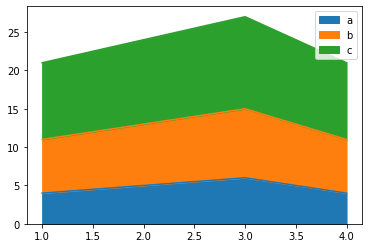

In [59]:
df.plot.area()

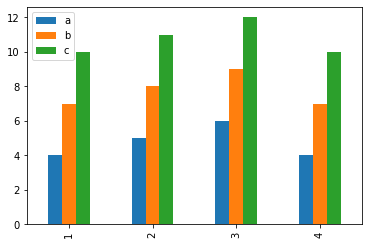

In [60]:
df.plot.bar()

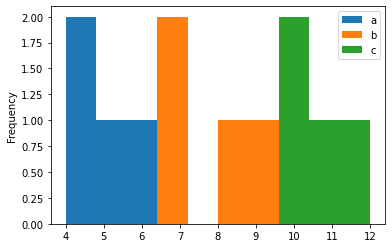

In [61]:
df.plot.hist()

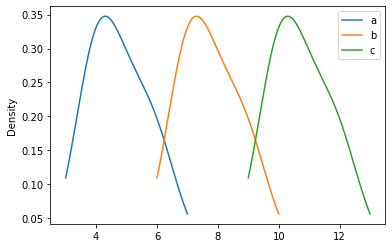

In [62]:
df.plot.density()